In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/spam_ham_dataset_hindi.csv")
df

,Unnamed: 0.1,Unnamed: 0,label,text,label_num,Hindi
0,0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,विषय: एनरॉन मेथनॉल; मीटर # : 988291\r\nयह उस न...
1,1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,विषय: 9 जनवरी 2001 के लिए एचपीएल नामांकन\r\n(स...
2,2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"विषय: नियॉन रिट्रीट\r\nहो हो हो, हम वर्ष के उस..."
3,3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"विषय: फ़ोटोशॉप, विंडोज़, कार्यालय। सस्ता । मुख..."
4,4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,विषय: पुन: भारतीय स्प्रिंग्स\r\nयह डील टेको पी...
...,...,...,...,...,...,...
5166,5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,विषय: 10 को पैरों पर रखें\r\nपरिवहन मात्रा 250...
5167,5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,विषय: 3 / 4 / 2000 और निम्नलिखित नामांक\r\nएचप...
5168,5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,विषय: कैलपाइन दैनिक गैस नामांकन\r\n>\r\n>\r\nज...
5169,5169,1409,ham,Subject: industrial worksheets for august 2000...,0,विषय: अगस्त 2000 की गतिविधि के लिए औद्योगिक का...


In [3]:
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
df

,label,text,label_num,Hindi
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,विषय: एनरॉन मेथनॉल; मीटर # : 988291\r\nयह उस न...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,विषय: 9 जनवरी 2001 के लिए एचपीएल नामांकन\r\n(स...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"विषय: नियॉन रिट्रीट\r\nहो हो हो, हम वर्ष के उस..."
3,spam,"Subject: photoshop , windows , office . cheap ...",1,"विषय: फ़ोटोशॉप, विंडोज़, कार्यालय। सस्ता । मुख..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,विषय: पुन: भारतीय स्प्रिंग्स\r\nयह डील टेको पी...
...,...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0,विषय: 10 को पैरों पर रखें\r\nपरिवहन मात्रा 250...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,विषय: 3 / 4 / 2000 और निम्नलिखित नामांक\r\nएचप...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,विषय: कैलपाइन दैनिक गैस नामांकन\r\n>\r\n>\r\nज...
5169,ham,Subject: industrial worksheets for august 2000...,0,विषय: अगस्त 2000 की गतिविधि के लिए औद्योगिक का...


In [4]:
x , y = df['Hindi'] , df['label']

In [5]:
x.shape,y.shape

((5171,), (5171,))

In [6]:
x.head()

0    विषय: एनरॉन मेथनॉल; मीटर # : 988291\r\nयह उस न...
1    विषय: 9 जनवरी 2001 के लिए एचपीएल नामांकन\r\n(स...
2    विषय: नियॉन रिट्रीट\r\nहो हो हो, हम वर्ष के उस...
3    विषय: फ़ोटोशॉप, विंडोज़, कार्यालय। सस्ता । मुख...
4    विषय: पुन: भारतीय स्प्रिंग्स\r\nयह डील टेको पी...
Name: Hindi, dtype: object

In [7]:
import nltk

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

def hindi_tokenizer(text):
    words = nltk.word_tokenize(text,language='hindi',preserve_line=True)
    return words

tfidf = TfidfVectorizer(tokenizer=hindi_tokenizer)
x_vect = tfidf.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [9]:
x_vect.shape

(5171, 60550)

In [10]:
x_vect.toarray()

array([[0.        , 0.08176894, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06984894, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state=0)

# Model building

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [13]:
svm = SVC(kernel='linear',random_state=0)

In [14]:
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [15]:
y_pred = svm.predict(x_test)

In [16]:
accuracy_score(y_test,y_pred)

0.9806651198762568

# Classification Using Deep Learning

In [17]:
x , y = df['Hindi'] , df['label']

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lbl = LabelEncoder()
y = lbl.fit_transform(y)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [21]:
X_train.shape

(4136,)

In [22]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [23]:
X_train

array(['विषय: असफल सौदे\r\nहाय डेरेन,\r\nहमारी फोन पर हुई बातचीत के अनुसार मैंने आपको एक फैक्स भेजा था, लेकिन मैं आपको इसकी जानकारी भी देना चाहता था\r\nअसफल सौदों की एक इलेक्ट्रॉनिक प्रति रखें जिसे बुक करने की आवश्यकता है\r\nसितारा. विचाराधीन छह ट्रेडों का विवरण संलग्न है। धन्यवाद !\r\nटॉरे मूरर (x 36218)',
       'विषय: 4/00 के लिए एनटेक्स संशोधित अनुमान\r\nमुझे लगता है कि फ़ाइल संलग्न करना बेहतर होगा।\r\nगैरी\r\n- - - - - - - - - - - - - - - - - - - - - 04/28/2000 11:26 को गैरी ए हैंक्स/एचओयू/ईसीटी द्वारा अग्रेषित\r\nपूर्वाह्न - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nएनरॉन उत्तरी अमेरिका कॉर्प.\r\nप्रेषक : गैरी ए हैंक्स 04 / 28 / 2000 11 : 27 पूर्वाह्न\r\nसेवा में: डेरेन जे किसान / एचओयू / ईसीटी @ ईसीटी, अमी चोकसी / कॉर्प / एनरॉन @ एनरॉन\r\nसीसी :\r\nविषय: 4/00 के लिए एंटेक्स संशोधित अनुमान\r\nसंलग्न स्प्रेडशीट में एंटेक्स सिटीगेट लोड के लिए संशोधित अनुमान हैं\r\nअप्रैल के लिए. अगर आपको चाहिए कि मैं पॉप्स के साथ मिलूं/सही करने या बदलने के लिए एकजुट हो जाऊं\r\nअनुमान क

In [24]:
y_train , y_test = np.array(y_train), np.array(y_test)

In [25]:
def preprocess_text(text):
    # You may need to implement more advanced preprocessing steps
    return text.split()

# Convert text data to numerical data
vocab = set()
for text in x:
    tokens = preprocess_text(text)
    vocab.update(tokens)

In [26]:
vocab_size = len(vocab)
embedding_dim = 100  # you may need to change this according to your task 100 is standard value
max_length = max(len(seq) for seq in x)
trunc_type= 'post'

In [27]:
import tensorflow as tf

In [28]:
# trn_snt = []
# tst_snt = []

# for i in X_train:
#     i = tf.strings.as_string(i)
#     trn_snt.append(str(i.numpy()))

# for j in X_test:
#     j = tf.strings.as_string(j)
#     trn_snt.append(str(i.numpy()))

In [29]:
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer


In [30]:
import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

2.12.0
2.12.0


In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [32]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index
len(word_idx)

53554

In [33]:
trn_seq = tokenizer.texts_to_sequences(X_train)
trn_pad = pad_sequences(trn_seq,maxlen=max_length,truncating=trunc_type)

tst_seq = tokenizer.texts_to_sequences(X_test)
tst_pad = pad_sequences(tst_seq,maxlen=max_length)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

### Using RNN

In [35]:
model_rnn = Sequential([
    Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32258, 100)        7139300   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7,143,897
Trainable params: 7,143,897
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_rnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
history = model_rnn.fit(trn_pad, y_train, epochs=1,
                  validation_data = (tst_pad, y_test),verbose=1)

130/130 [==============================] - 13888s 107s/step - loss: 0.5067 - accuracy: 0.7389 - val_loss: 0.4036 - val_accuracy: 0.7990


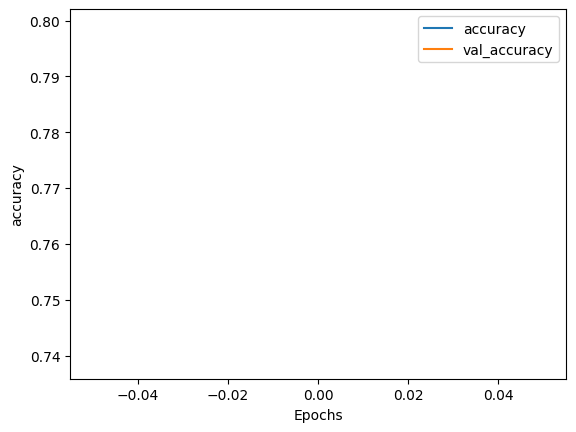

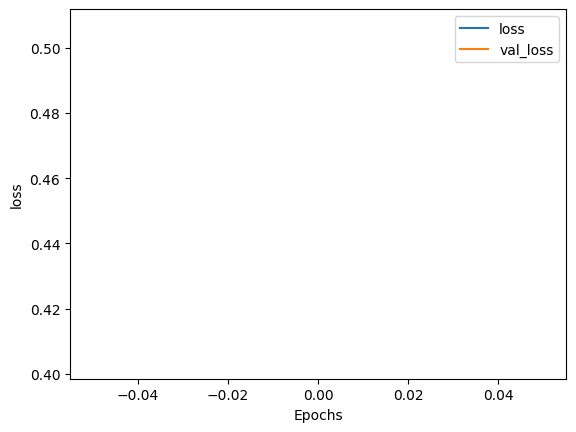

In [38]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Using GRU

In [39]:
from keras.layers import Bidirectional, GRU

In [40]:
model_gru = Sequential([

    Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [41]:
model_gru.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32258, 100)        7139300   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               25728     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7,165,689
Trainable params: 7,165,689
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model_gru.fit(trn_pad, y_train, epochs=5,
                  validation_data = (tst_pad, y_test),verbose=1)

Epoch 1/5
130/130 [==============================] - 213s 2s/step - loss: 0.3648 - accuracy: 0.8375 - val_loss: 0.1488 - val_accuracy: 0.9372
Epoch 2/5
130/130 [==============================] - 206s 2s/step - loss: 0.0545 - accuracy: 0.9814 - val_loss: 0.1434 - val_accuracy: 0.9536
Epoch 3/5
130/130 [==============================] - 204s 2s/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.1163 - val_accuracy: 0.9681
Epoch 4/5
130/130 [==============================] - 202s 2s/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.1195 - val_accuracy: 0.9671
Epoch 5/5
130/130 [==============================] - 202s 2s/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1256 - val_accuracy: 0.9681


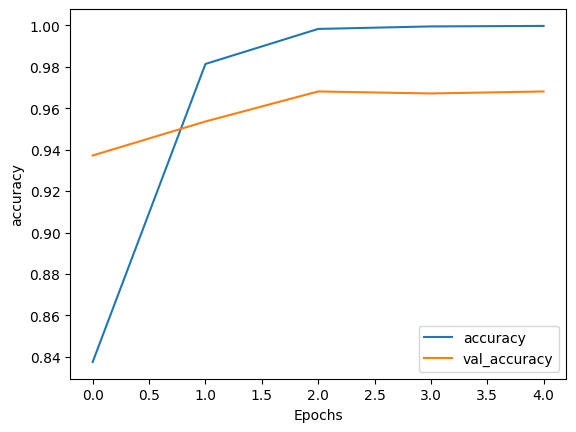

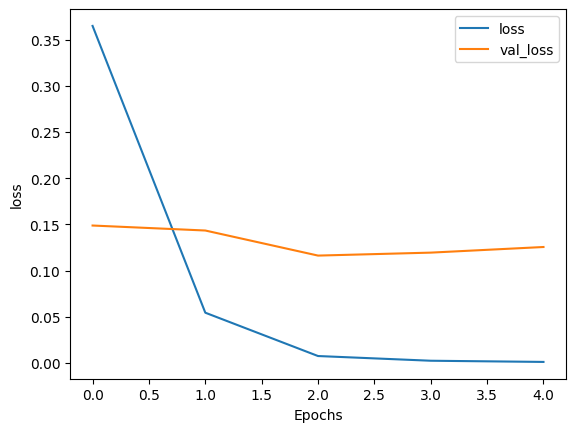

In [43]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Using LSTM

In [44]:
from keras.layers import LSTM

In [45]:
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    Bidirectional(LSTM(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 32258, 100)        7139300   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7,174,009
Trainable params: 7,174,009
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_lstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
history = model_lstm.fit(trn_pad, y_train, epochs=5,
                  validation_data = (tst_pad, y_test),verbose=1)

Epoch 1/5
130/130 [==============================] - 214s 2s/step - loss: 0.3286 - accuracy: 0.8513 - val_loss: 0.1311 - val_accuracy: 0.9498
Epoch 2/5
130/130 [==============================] - 207s 2s/step - loss: 0.0455 - accuracy: 0.9874 - val_loss: 0.0962 - val_accuracy: 0.9633
Epoch 3/5
130/130 [==============================] - 204s 2s/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.1019 - val_accuracy: 0.9671
Epoch 4/5
130/130 [==============================] - 205s 2s/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.1059 - val_accuracy: 0.9681
Epoch 5/5
130/130 [==============================] - 208s 2s/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.1066 - val_accuracy: 0.9700


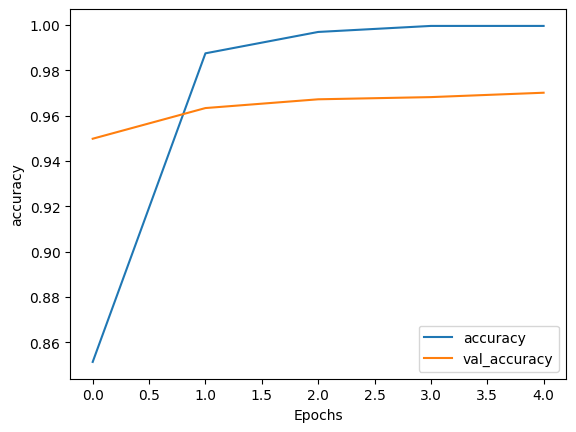

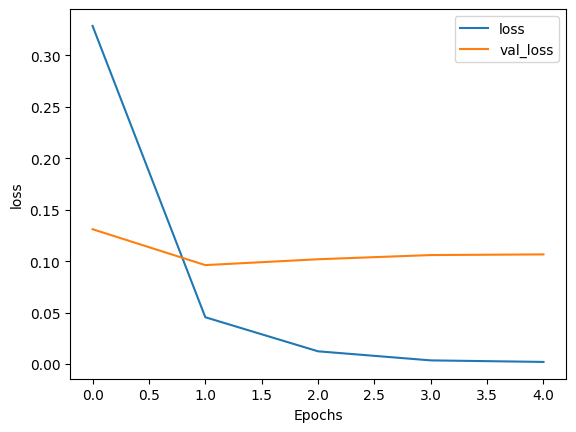

In [48]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# Ploting curves

In [49]:
###------------------
### parameters to plot Loss curve
###------------------

params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (12,9),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }
CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

###-----------------------------------
### Function to plot Loss Curve
###-----------------------------------

def plot_tf_hist(hist_df):
    '''
    Args:
      hist_df : pandas Dataframe with four columns
                For 'x' values, we will use index
    '''
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]

    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "{}: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(y1.capitalize(),
                           hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y3].to_numpy()[0]), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper right') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = "{}: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(y2.capitalize(),
                           hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y4].to_numpy()[0]), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower right')

    plt.tight_layout()

In [50]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.328576,0.851306,0.131054,0.949758
1,0.045544,0.987427,0.096191,0.963285
2,0.012442,0.996857,0.101883,0.967150
3,0.003623,0.999516,0.105949,0.968116
4,0.002129,0.999516,0.106595,0.970048


In [51]:
hist_df.describe()

,loss,accuracy,val_loss,val_accuracy
count,5.000000,5.000000,5.000000,5.000000
mean,0.078463,0.966925,0.108334,0.963671
std,0.140914,0.064824,0.013360,0.008158
min,0.002129,0.851306,0.096191,0.949758
25%,0.003623,0.987427,0.101883,0.963285
50%,0.012442,0.996857,0.105949,0.967150
75%,0.045544,0.999516,0.106595,0.968116
max,0.328576,0.999516,0.131054,0.970048


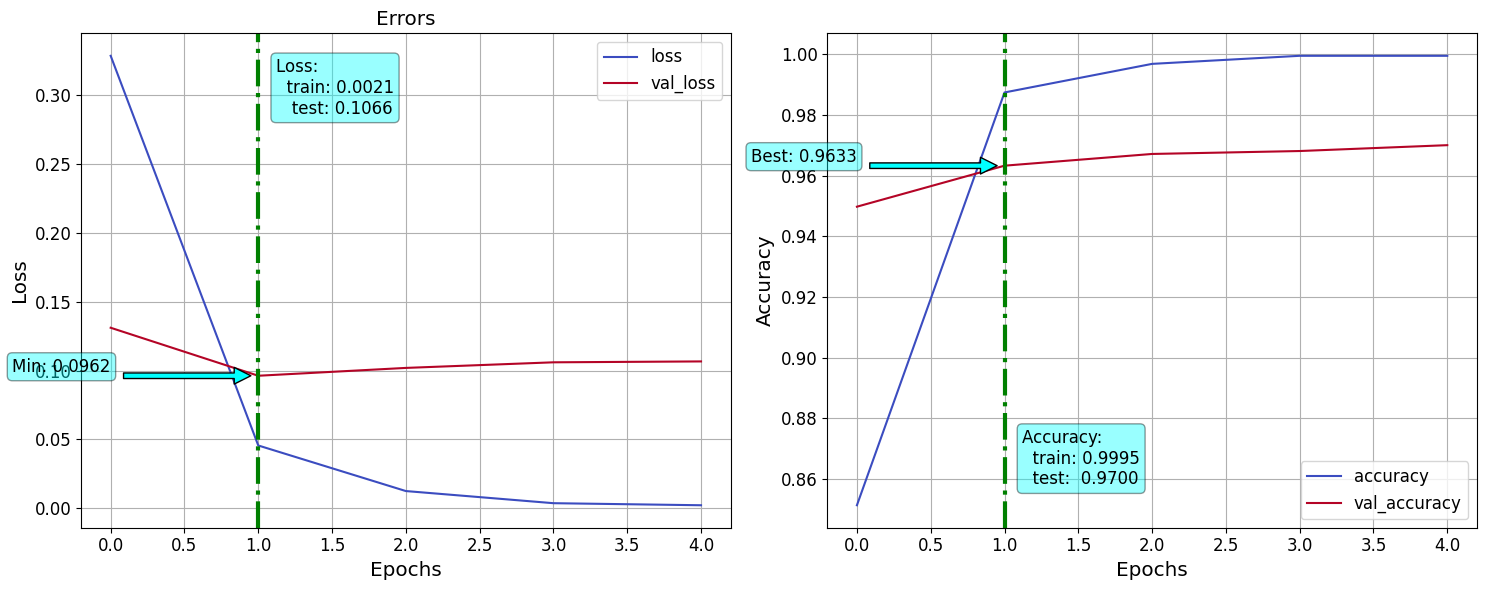

In [52]:
plot_tf_hist(hist_df)

# Conclusion:

### Observing the loss and accuracy curves the simple RNN model is most accurate for this particular classification problem